# 移動平均線 (Moving Average , MA)

### 賴志宏 Chih-Hung Lai

Created: 2021.11.28  Last modified:2021.12.01

# 內容介紹：

* 1. 需要用到的圖形技巧
    * 1.1 增加線條
    * 1.2 標出買賣點（加入標記點）
* 2. 移動平均線
    * 2.1 定義與公式
    * 2.2 自製移動平均線
    * 2-3 移動平均線 買賣點應用
* 3. 利用移動平均線進行買賣的交易分析
    * 3.1 案例一：5日線突破10日線買入，10日線突破5日線賣出
    * 3.2 案例2：簡單價線
    * 3.3 案例3：黃金交叉與死亡交叉
    * 3.4 案例4：交叉+帶量


-------------------------------------------------------------------------------------------------------------------------------

In [1]:
%pip install mplfinance

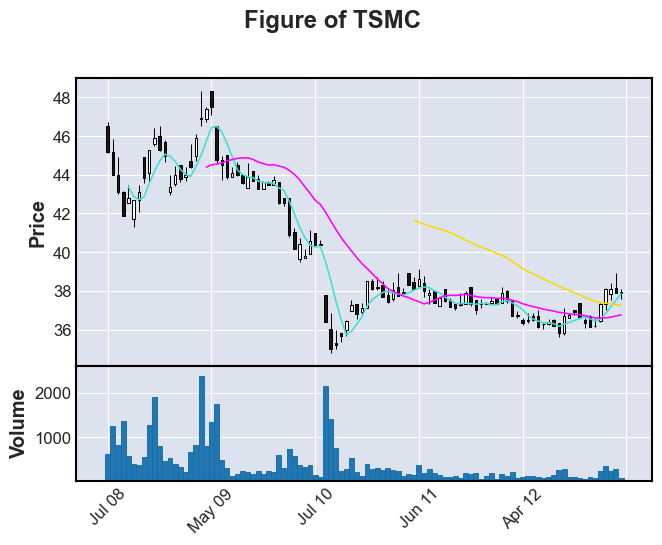

In [2]:
# 基本繪圖

from datetime import datetime
import pandas as pd
import time
import mplfinance as mpf

SData = pd.read_csv('stocks_3169.csv', index_col = 'Date')

SData.index = pd.DatetimeIndex(SData.index)

SData = SData.tail(100)        # 取最後100筆

mpf.plot(SData, type='candle',
        title='Figure of TSMC',
        ylabel='Price',
        ylabel_lower='Volume',
        volume=True, 
        mav=(5, 20, 60))  # 5日線、10日線、季線

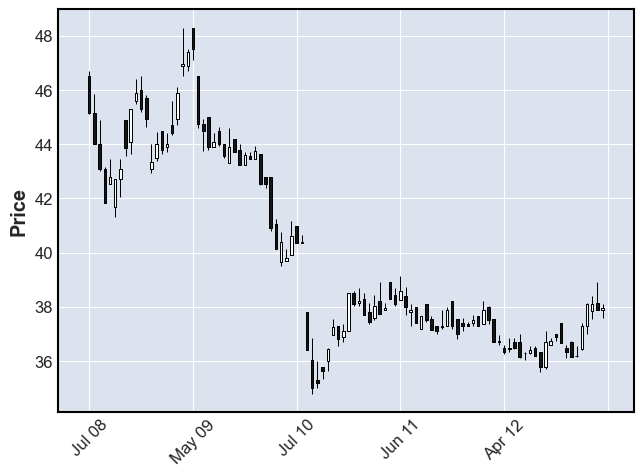

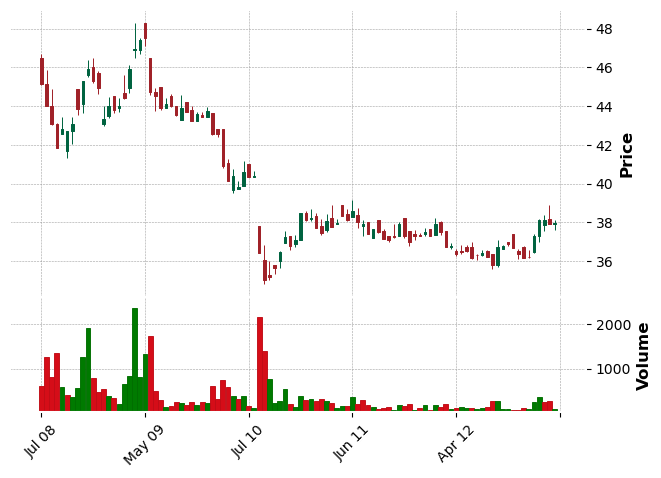

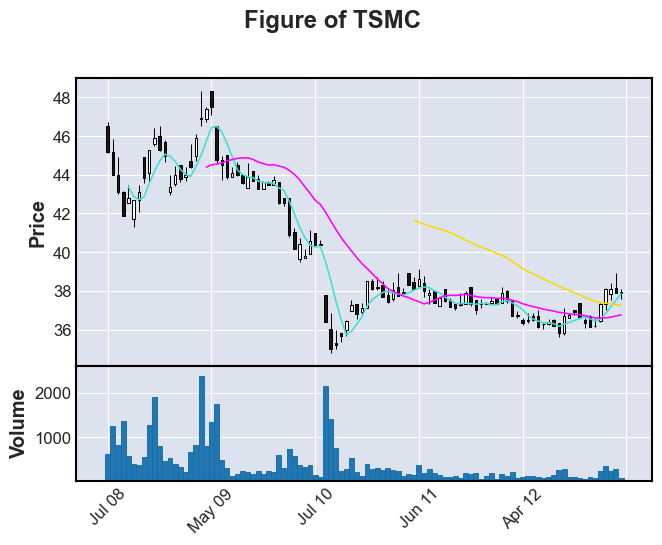

In [3]:
# 基本繪圖

from datetime import datetime
import pandas as pd
import time
import mplfinance as mpf

SData = pd.read_csv('stocks_3169.csv', index_col = 'Date')

SData.index = pd.DatetimeIndex(SData.index)

SData = SData.tail(100)        # 取最後100筆

mpf.plot(SData, type='candle')  # 簡單版本

mpf.plot(SData, type='candle', style ='charles', volume=True)  # 更改顏色，並加上成交量

mpf.plot(SData, type='candle',
        title='Figure of TSMC',
        ylabel='Price',
        ylabel_lower='Volume',
        volume=True, 
        mav=(5, 20, 60))  # 5日線、10日線、季線

# 需要用到的圖形技巧

## 1.1 增加自訂的線條

- 方法一：
    - 在mpf.plot() 中加入：addplot = mpf.make_addplot(exp,color='lime')
- 方法二：
    - 先定義，之後再使用
    - 例如：
        - exp = SData['Close']*1.5
        - apds = mpf.make_addplot(exp,color='lime')   # 一條線的繪圖方式
        - mpf.plot(SData, addplot=apds)    # 繪製股價圖與多出來的圖，要多畫圖可以設定 addplot 參數
        
### 增加數條自訂的線條

- apds = [mpf.make_addplot(exp12,color='lime'),
-         mpf.make_addplot(exp26,color='c'),
-         mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,
-                          color='dimgray',alpha=1,secondary_y=False),
-         mpf.make_addplot(macd,panel=1,color='fuchsia',secondary_y=True),
-         mpf.make_addplot(signal,panel=1,color='b',secondary_y=True)]

mpf.plot(SData, addplot=apds)    # 繪製股價圖與多出來的圖，要多畫圖可以設定 addplot 參數

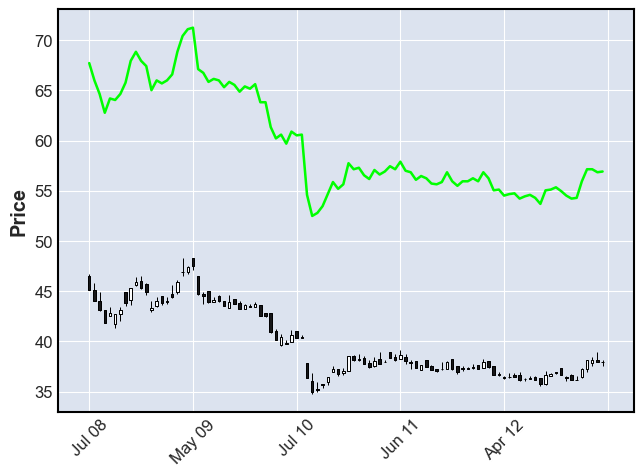

In [4]:
exp = SData['Close']*1.5
# 方法一：
mpf.plot(SData, addplot = mpf.make_addplot(exp,color='lime'), type='candle') 

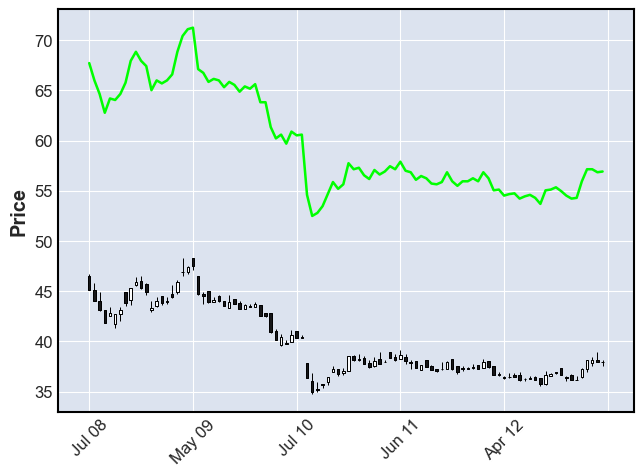

In [5]:
# 方法二：

apds = mpf.make_addplot(exp,color='lime')   # 一條線的繪圖方式

mpf.plot(SData, addplot=apds, type='candle')    # 繪製股價圖與多出來的圖，要多畫圖可以設定 addplot 參數

### 增加多條線

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1109: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return self._getitem_tuple_same_dim(tup)


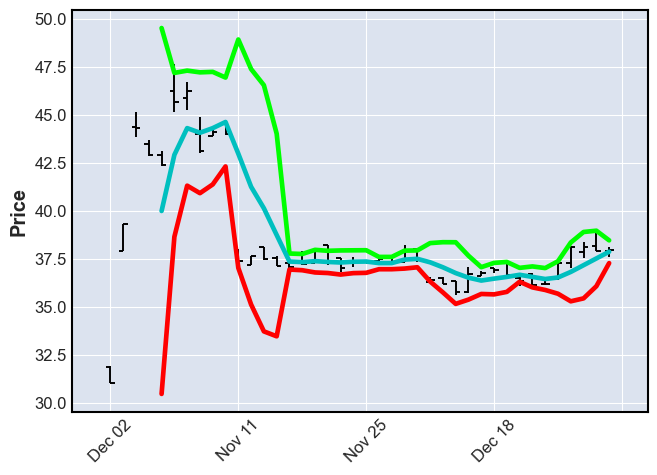

In [6]:
# 增加多條線的範例
# 增加自訂的繪圖資料
# 布林通道

from talib import abstract
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd

stock = pd.read_csv('stocks_3169.csv', index_col = 'Date')
stock.index = pd.DatetimeIndex(stock.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定

stock = stock.loc['2019/11/05':,:]   # 取2019/11/05之後的資料

# abstract 需要的 columns 的名稱需要修改
stock2 = stock.copy()
stock2.columns = ['open', 'high', 'low', 'close', 'volume']    
a = abstract.BBANDS(stock2)

upper =a['upperband']
middle =a['middleband']
lower = a['lowerband']

apds = [mpf.make_addplot(upper,color='lime'),
        mpf.make_addplot(middle,color='c'),
        mpf.make_addplot(lower,color='r'),
       ]

mpf.plot(stock2, addplot=apds)    # 繪製股價圖


## 1.2 加入指出買賣點的圖示

In [7]:
from datetime import datetime
import pandas as pd
import time
import mplfinance as mpf
import numpy as np

SData = pd.read_csv('stocks_3169.csv', index_col = 'Date')

SData.index = pd.DatetimeIndex(SData.index)

SData = SData.tail(100)        # 取最後100筆

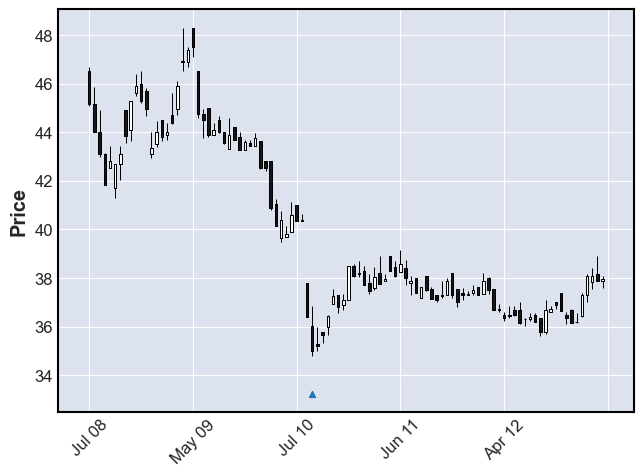

In [8]:
# 加入指出買賣點的圖示

stocks_close = [float(line) for line in SData["Close"]]

points = []                   # 設定哪些點要標出來，也就是要標出來的點，設定它的值，其餘就設為 np.nan
for i in range(0, len(SData)):
    #收盤價小於等於35則標點
    if(35 >= stocks_close[i]):
        points.append(stocks_close[i] * 0.95) 
    else:
        points.append(np.nan)

# type要注意 是scatter，有許多種 marker
addplots = mpf.make_addplot(points, type = 'scatter', marker = '^')
mpf.plot(SData, type = 'candle', addplot = addplots)

## Markers:
### https://matplotlib.org/3.1.1/api/markers_api.html

## Colors:
### https://matplotlib.org/3.3.3/gallery/color/named_colors.html

 # 2. 移動平均線

##  2.1 定義與公式

* 移動平均線定義：過去某段時間裡的平均成交價格
* 移動平均線公式：過去N天的收盤價加總除以N

In [9]:
# 5日MA的算法，方法一
# Lai
# 前面四個數的平均皆有平均


price = [i for i in range(1, 20)]
MA = []
MAarray = []
MAlen = 5
for i in price:
    if len(MAarray) < MAlen:
        MAarray += [i]
    else:
        MAarray = MAarray[1:] + [i]
    print('近五個數字:', MAarray)
    MAvalue = float(sum(MAarray) / len(MAarray))
    MA.append(MAvalue)
print('原始數字', price)
print('5日的MA:', MA)

近五個數字: [1]
近五個數字: [1, 2]
近五個數字: [1, 2, 3]
近五個數字: [1, 2, 3, 4]
近五個數字: [1, 2, 3, 4, 5]
近五個數字: [2, 3, 4, 5, 6]
近五個數字: [3, 4, 5, 6, 7]
近五個數字: [4, 5, 6, 7, 8]
近五個數字: [5, 6, 7, 8, 9]
近五個數字: [6, 7, 8, 9, 10]
近五個數字: [7, 8, 9, 10, 11]
近五個數字: [8, 9, 10, 11, 12]
近五個數字: [9, 10, 11, 12, 13]
近五個數字: [10, 11, 12, 13, 14]
近五個數字: [11, 12, 13, 14, 15]
近五個數字: [12, 13, 14, 15, 16]
近五個數字: [13, 14, 15, 16, 17]
近五個數字: [14, 15, 16, 17, 18]
近五個數字: [15, 16, 17, 18, 19]
原始數字 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
5日的MA: [1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]


In [10]:
# 5日MA的算法，方法二
# Lai
# 前面四個數不取平均

price = [i for i in range(1, 20)]

MA2 = [np.nan] * 4
for i in range(4, len(price)):
    MA2.append((sum(price[i-4:i+1])/MAlen))
print(price)
print(MA2)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[nan, nan, nan, nan, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]


In [11]:
# 移動平均線的值的算法

#宣告陣列放置 5日線之值，前四個為 np.nan
five_mav = [np.nan] * 4

#計算五日平均線

for i in range(4, len(stocks_close)):
    five_mav.append( sum( stocks_close[ i-4 : i+1 ]) / 5 )

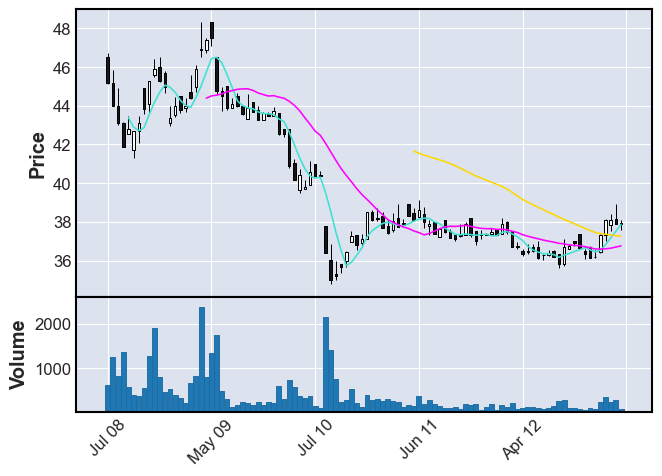

In [12]:
import pandas as pd
import mplfinance as mpfx

#讀資料 (亞信3169)
stocks = pd.read_csv('stocks_3169.csv')

#整理以及排列資料 
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")

#取最新100筆資料
stocks = stocks.tail(100)

#繪圖 (股票資料、印出成交量、設定風格(蠟燭圖)、移動平均線(5, 20, 60))
mpf.plot(stocks, volume = True, type = 'candle', mav = (5, 20, 60))

## 2-2 移動平均線 計算與繪圖

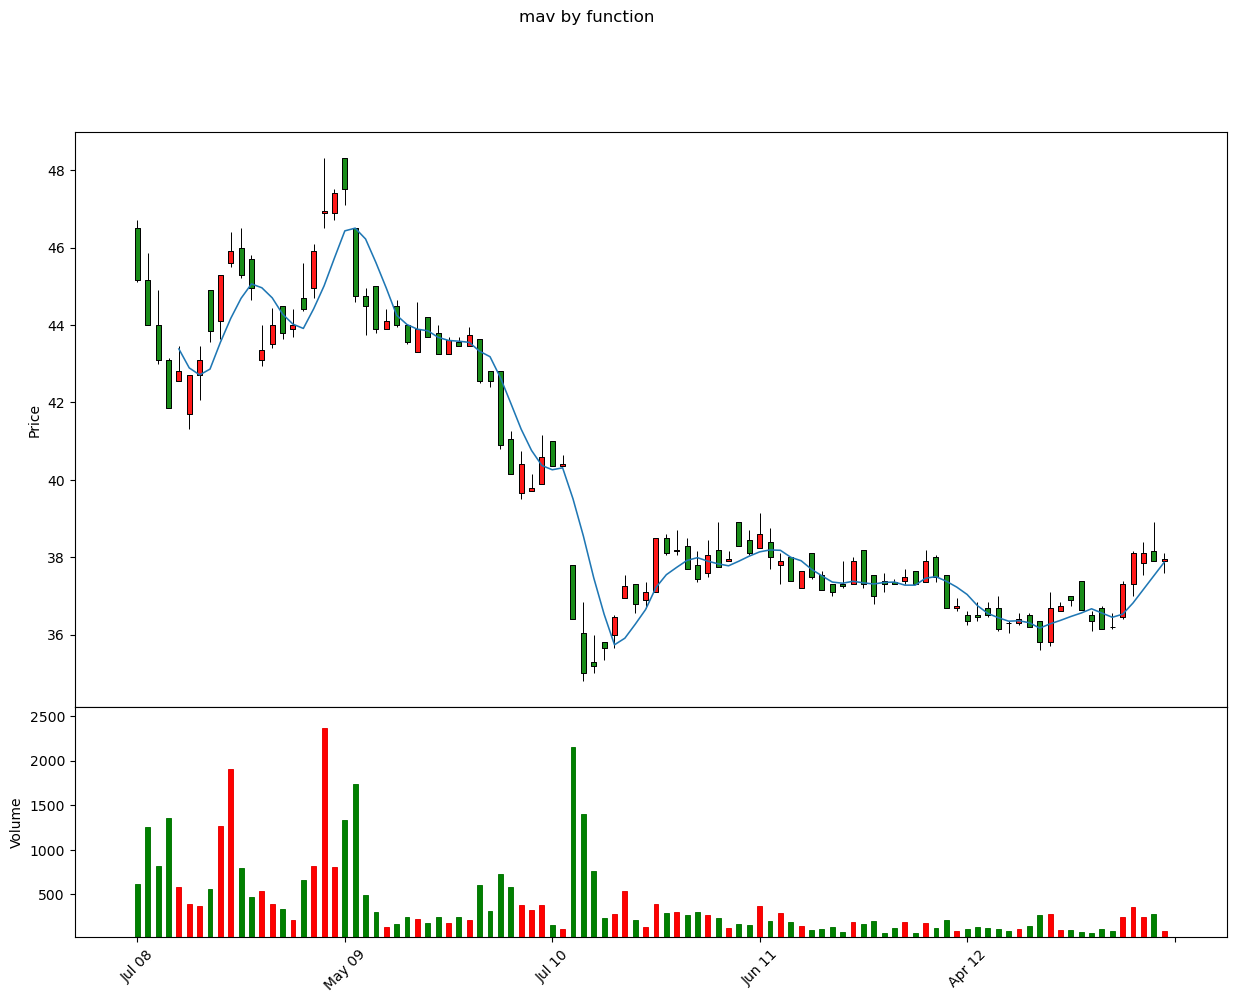

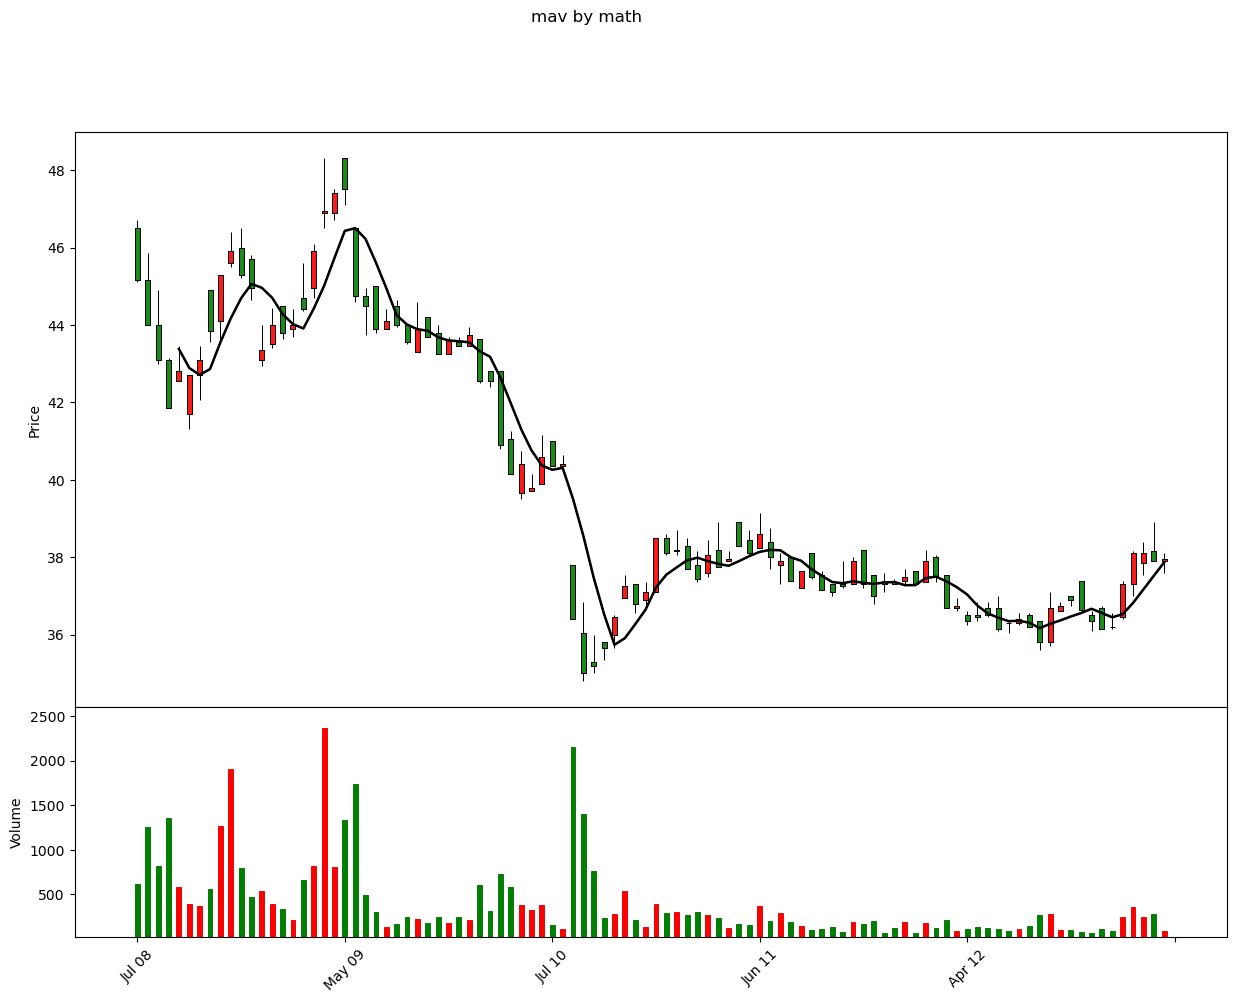

In [13]:
#使用數學方式計算 5日線
import numpy as np
import pandas as pd
import mplfinance as mpf

#讀資料 (亞信3169) 20150105-20191231
stocks = pd.read_csv('stocks_3169.csv')

#整理以及排列資料 
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")

#取最新100筆資料
stocks = stocks.tail(100)

#自定義
#紅漲綠跌 (更改顏色)
colorSet = mpf.make_marketcolors(up = 'r', down = 'g', volume = 'inherit')

#style也要一起做更改
styleSet = mpf.make_mpf_style(marketcolors = colorSet)

#kwargs
kwargs = dict(type = 'candle', mav = 5, volume = True, figscale = 2,\
              style = styleSet, scale_width_adjustment = dict(volume = 0.5))

#繪圖 (上方的圖)
mpf.plot(stocks, **kwargs, title = 'mav by function')

#############################################################################

#stocks_close是近 100天收盤價的 list
stocks_close = [line for line in stocks['Close']]

#宣告陣列放置 5日線之值，前四個為 np.nan
five_mav = [np.nan] * 4

#計算五日平均線
for i in range(4, len(stocks_close)):
    five_mav.append( sum( stocks_close[ i-4 : i+1 ]) / 5 )

#使用 addplot
five = mpf.make_addplot(five_mav, color = 'black')

#將自製 5日線匯出 (下方的圖)
mpf.plot(stocks, **kwargs, addplot = five, title = 'mav by math')

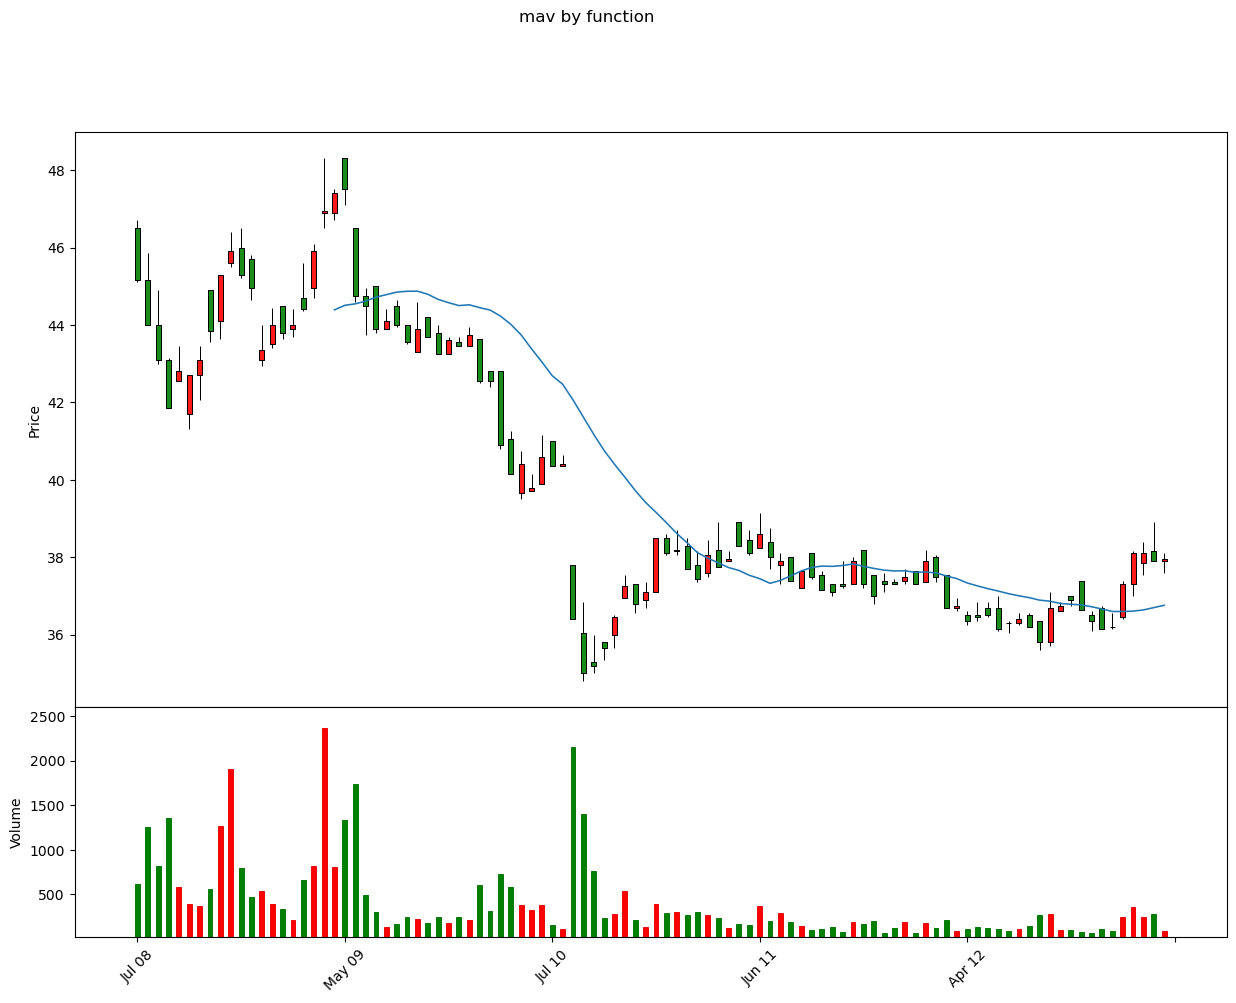

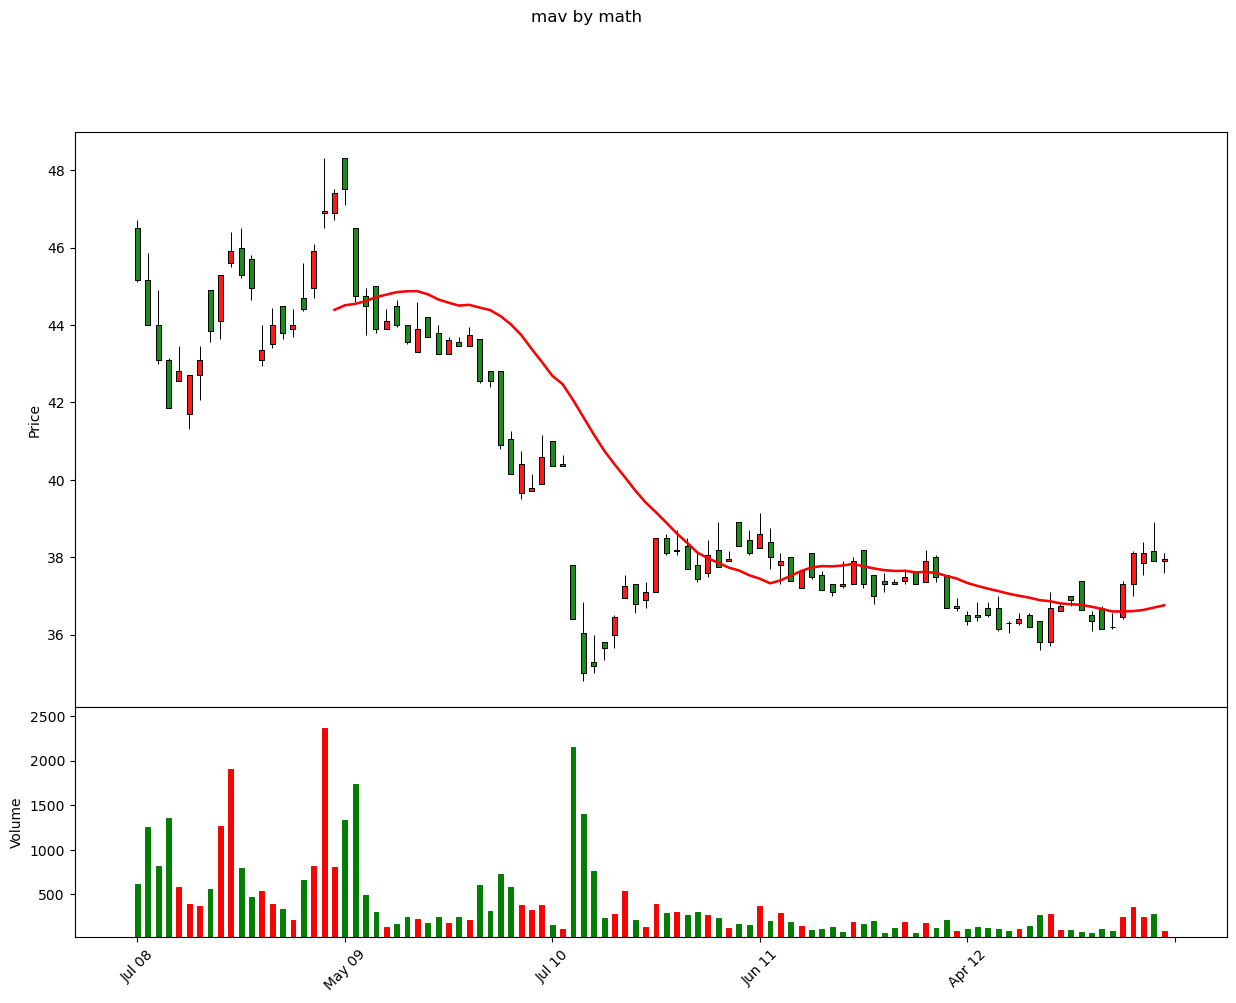

In [14]:
#使用數學方式計算 20日線
import numpy as np
import pandas as pd
import mplfinance as mpf

#讀資料 (亞信3169) 20150105-20191231
stocks = pd.read_csv('stocks_3169.csv')

#整理以及排列資料 
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")

#取最新100筆資料
stocks = stocks.tail(100)

#客製化
#紅漲綠跌 (更改顏色)
colorSet = mpf.make_marketcolors(up = 'r', down = 'g', volume = 'inherit')

#style也要一起做更改
styleSet = mpf.make_mpf_style(marketcolors = colorSet)

#kwargs
kwargs = dict(type = 'candle', mav = 20, volume = True, figscale = 2,\
              style = styleSet, scale_width_adjustment = dict(volume = 0.5))

#繪圖 (上方的圖)
mpf.plot(stocks, **kwargs, title = 'mav by function')

#############################################################################

#stocks_close是進 100天收盤價的 list
stocks_close = [line for line in stocks['Close']]

#宣告陣列放置 20日線之值
twenty_mav = [np.nan] * 19

#計算二十日平均
for i in range(19, len(stocks_close)):
    twenty_mav.append( sum( stocks_close[i-19 : i+1]) / 20 )

#使用 addplot
twenty = mpf.make_addplot(twenty_mav, color = 'red')

#將自製 20日線匯出 (下方的圖)
mpf.plot(stocks, **kwargs, addplot = twenty, title = 'mav by math')

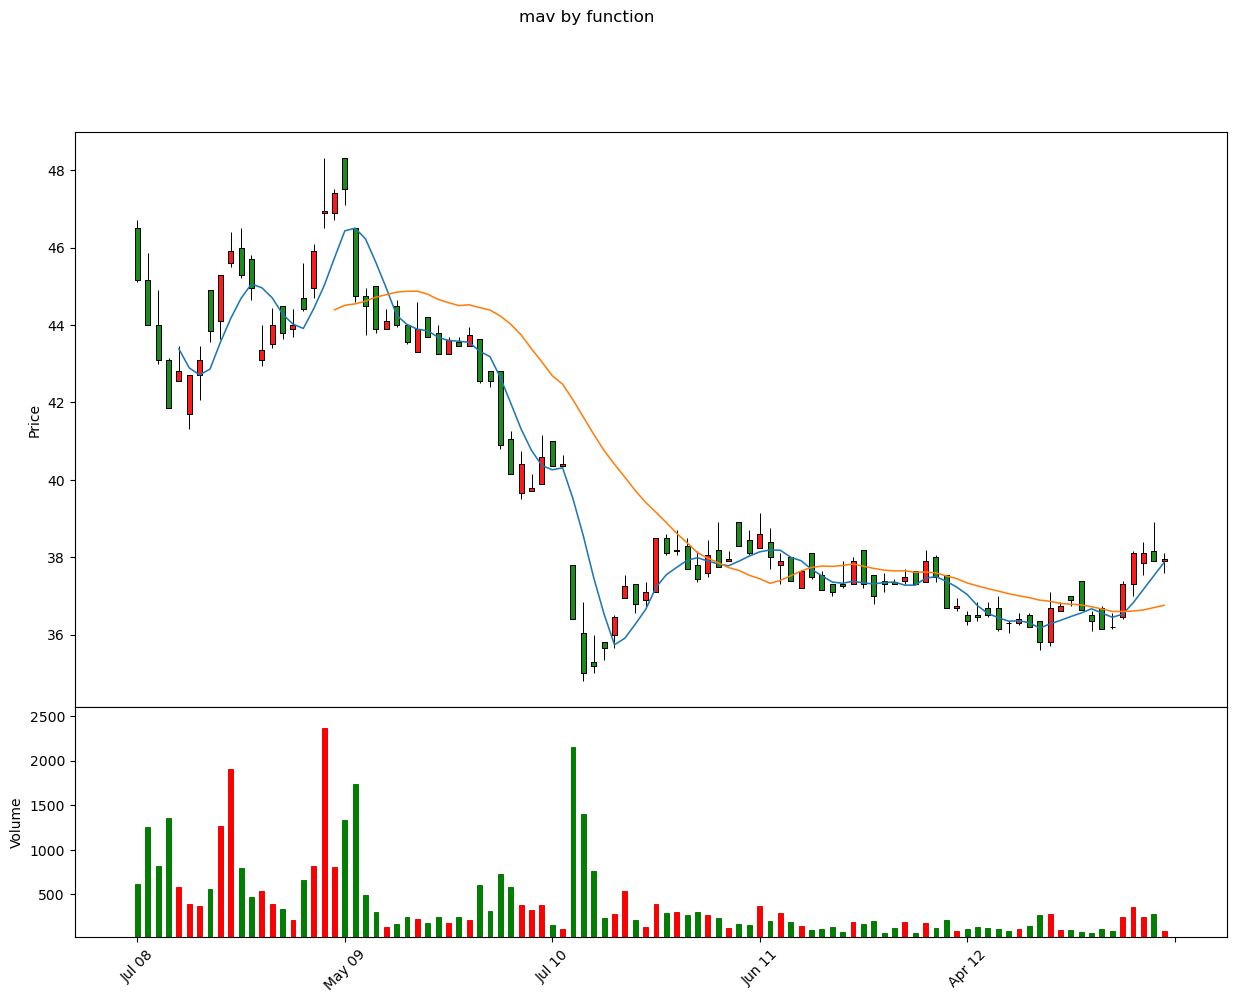

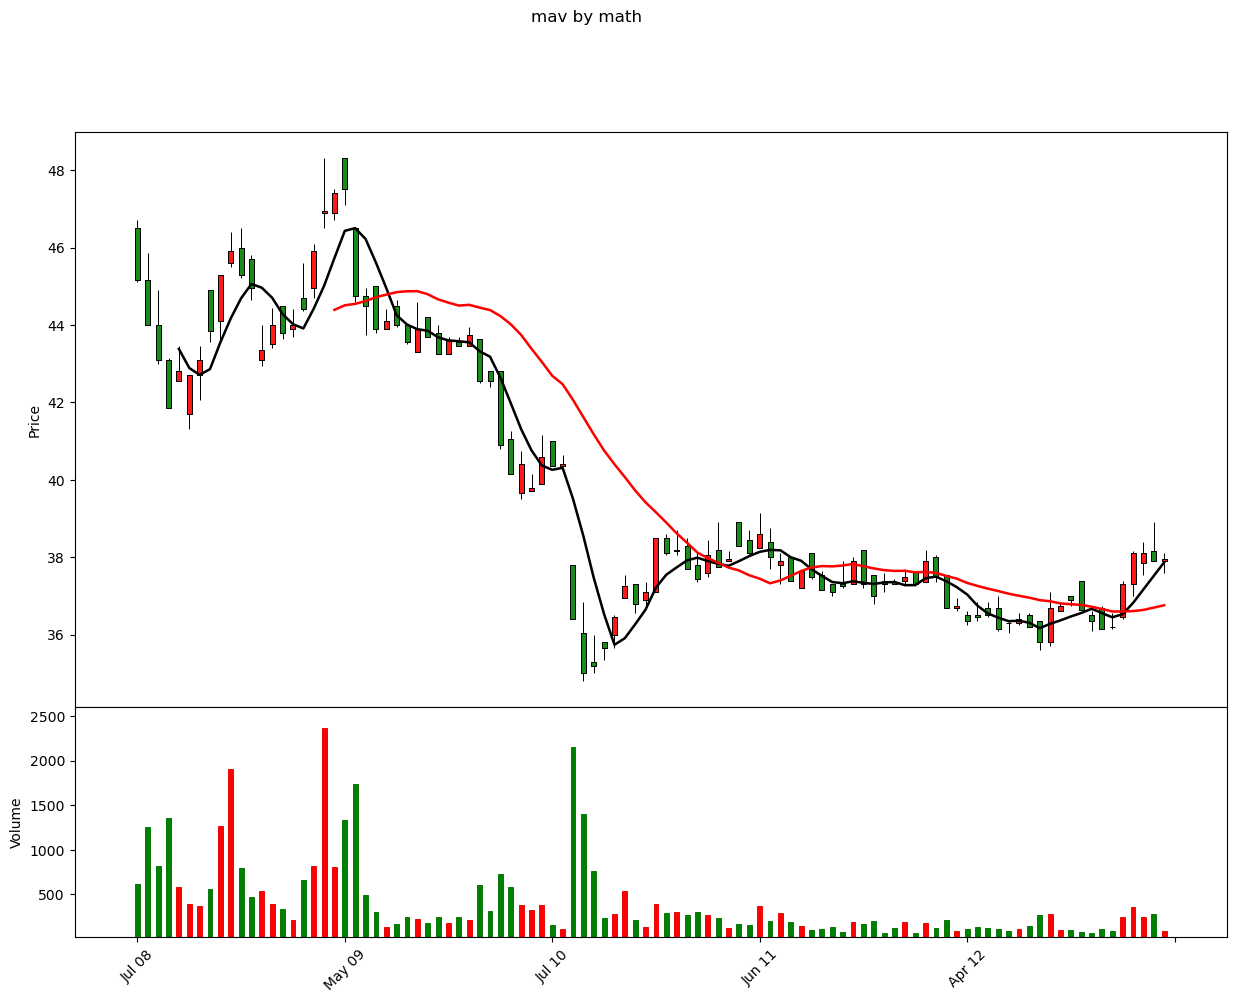

In [15]:
#使用數學方式計算 n日線 - 函式版本
import numpy as np
import pandas as pd
import mplfinance as mpf

#讀資料 (亞信3169) 20150105-20191231
stocks = pd.read_csv('stocks_3169.csv')

#整理以及排列資料 
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%d/%m/%Y")

#取最新100筆資料
stocks = stocks.tail(100)

#客製化
#紅漲綠跌 (更改顏色)
colorSet = mpf.make_marketcolors(up = 'r', down = 'g', volume = 'inherit')

#style也要一起做更改
styleSet = mpf.make_mpf_style(marketcolors = colorSet)

#kwargs
kwargs = dict(type = 'candle', mav = (5, 20), volume = True, figscale = 2,
    style = styleSet, scale_width_adjustment = dict(volume = 0.5))

#繪圖 (上方的圖)
mpf.plot(stocks, **kwargs, title = 'mav by function')

#############################################################################

#stocks_close是近 100天收盤價的 list
stocks_close = [line for line in stocks['Close']]

#開始寫函式
def making_averages(days):
    days_mav = [np.nan] * (days - 1)
    for i in range((days - 1), len(stocks_close)):
        days_mav.append( sum( stocks_close[i-(days - 1) : i+1]) / (days) )
    return days_mav

#############################################################################

#使用 addplot
addplots = [mpf.make_addplot(making_averages(5), color = 'black'),
            mpf.make_addplot(making_averages(20), color = 'red')]

#kwargs2
kwargs2 = dict(type = 'candle', volume = True, figscale = 2,
    style = styleSet, scale_width_adjustment = dict(volume = 0.5))

#將自製 5日線、20日線匯出 (下方的圖)
mpf.plot(stocks, **kwargs2, addplot = addplots, title = 'mav by math')

-------------------------------------------------------------------------------------------------------------------------------

## 2-3 移動平均線 買賣點應用

### 移動平均的的功能： 

* 趨勢的特性 
* 穩定的特性 
* 時間落後的特性 
* 助漲的特性
* 助跌的特性 



<img src = "images/MA1.png" width = 600 height =300 align = "left">

### 葛蘭碧(Granville)八大法則   
  
<img src = "images/Granville_8.png" width = 600 height =300 align = "left">


### 20日MA線之意義及判別  

#### 底部—漲勢已現
1. 股價由下而上突破20日MA線，可酌量買進，若以紅K線突破更應買進。
2. 股價站上20日MA線，20日MA線由水平往上走，持股可增加。
3. 股價站上20日MA線，20日MA線往上走45º角，加碼買進。
4. 當股價加速上漲時，尤其是走45º角，股價有一大波段行情可循，投資人可以在股價正乖離大時出脫持股，等拉回至20日MA線，而20日MA線仍然上揚時，再進場介入。

#### 高檔—跌勢已現

1. 股價由上往下跌破20日MA線，持股減碼，若以黑K線跌破，更應減碼。
2. 股價在20日MA線之下，20日MA線由水平向下彎，持股再減碼，可酌量作空。
3. 股價在20日MA線之下，20日MA線向下彎且呈45º角走勢，出清持股可擇機放空。
4. 當股價加速下跌時，尤其是走45º角，股價有一大波段跌幅，投資人可以在股價負乖離大時，進場搶反彈，等反彈到20日MA線，而20日MA線仍然向下彎時，再出脫。


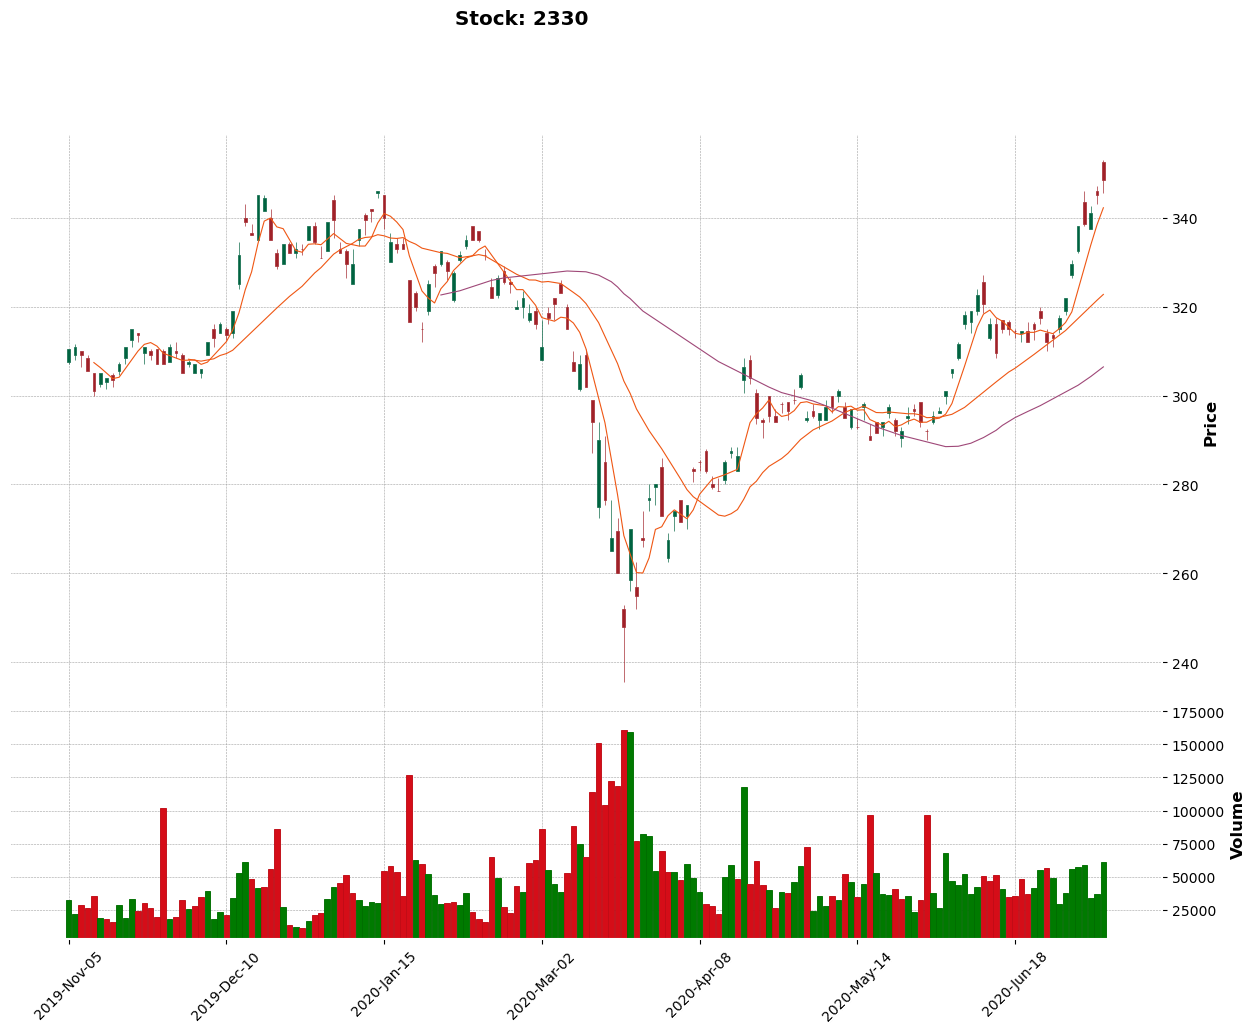

In [16]:
# 改變顏色(style)、圖案大小(figscale)、與長寬比例(figratio)
    # ：上漲使用紅色，下跌使用綠色
# style = 'charles'
# style = 'mike'    使用實心與空心來表示
# 可以使用 mpf.available_styles() 來看有哪些 style可以使用

from datetime import datetime
import pandas as pd

SData = pd.read_csv(r'C:\Coding\43_School_S3\investment\week06\2330.csv', index_col = 'Date')

# SData2 = SData.tail(200)  # 只取最後200筆的資料

SData.index = pd.DatetimeIndex(SData.index)
SData = SData.loc['2019/11/05':'2020/7/10',:]


import mplfinance as mpf


mpf.plot(SData, type = 'candle', mav = [5, 20, 60], volume = True,
         title='Stock: 2330', style ='charles', figscale = 2)     # 圖案大小


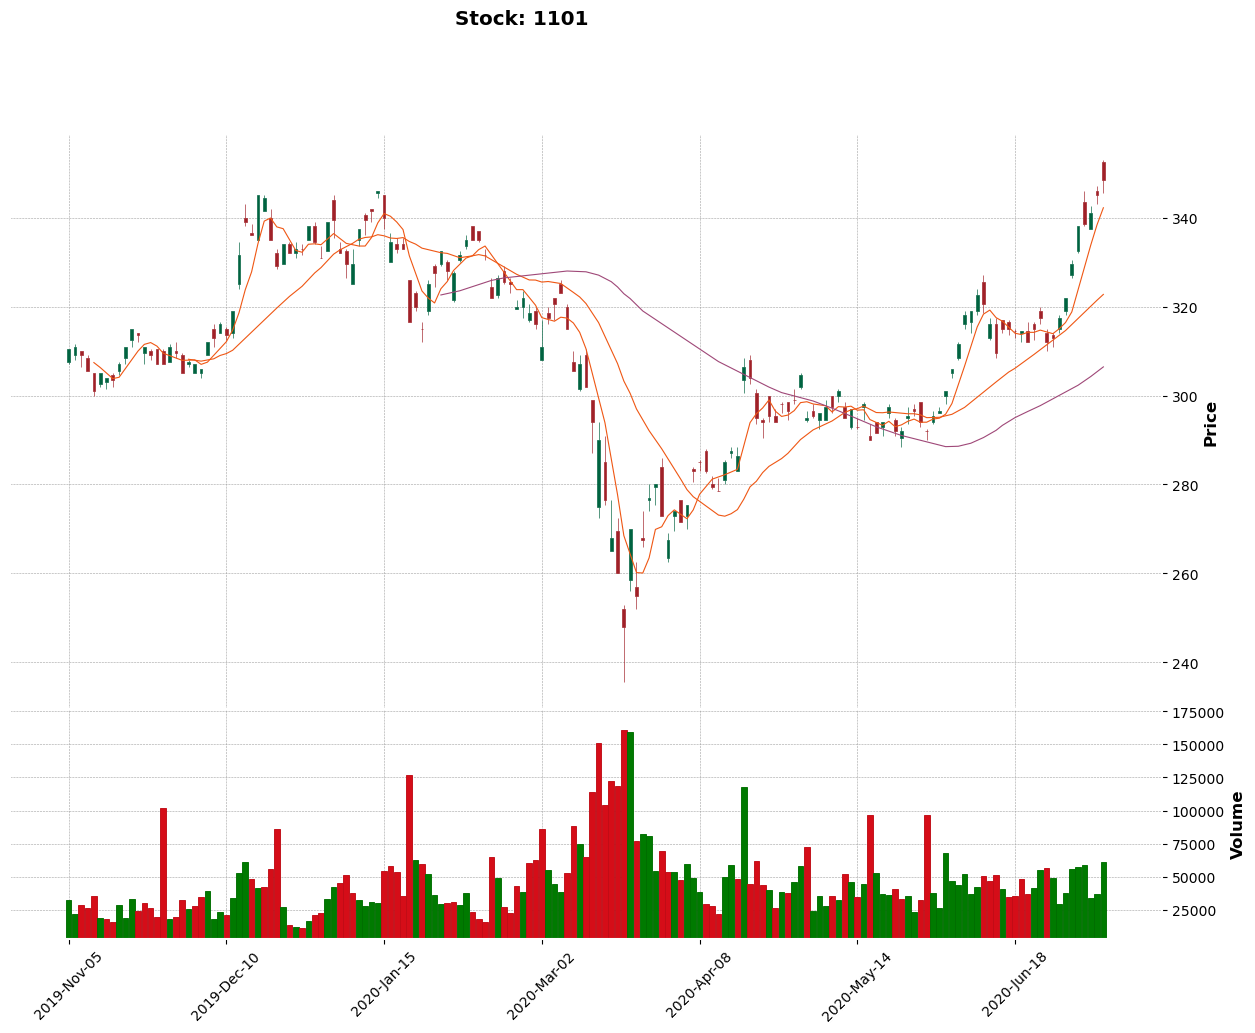

In [17]:
# 改變顏色(style)、圖案大小(figscale)、與長寬比例(figratio)
    # ：上漲使用紅色，下跌使用綠色
# style = 'charles'
# style = 'mike'    使用實心與空心來表示
# 可以使用 mpf.available_styles() 來看有哪些 style可以使用

from datetime import datetime
import pandas as pd

SData = pd.read_csv(r'C:\Coding\43_School_S3\investment\week06\2330.csv', index_col = 'Date')

# SData2 = SData.tail(200)  # 只取最後200筆的資料

SData.index = pd.DatetimeIndex(SData.index)
SData = SData.loc['2019/11/05':'2020/7/10',:]


import mplfinance as mpf


mpf.plot(SData, type = 'candle', mav = [5, 20, 60], volume = True, title='Stock: 1101', 
         style ='charles', figscale = 2)     # 圖案大小


# 3. 利用移動平均線進行買賣的交易分析

## 3.1 案例1：5日線突破10日線買入，10日線突破5日線賣出

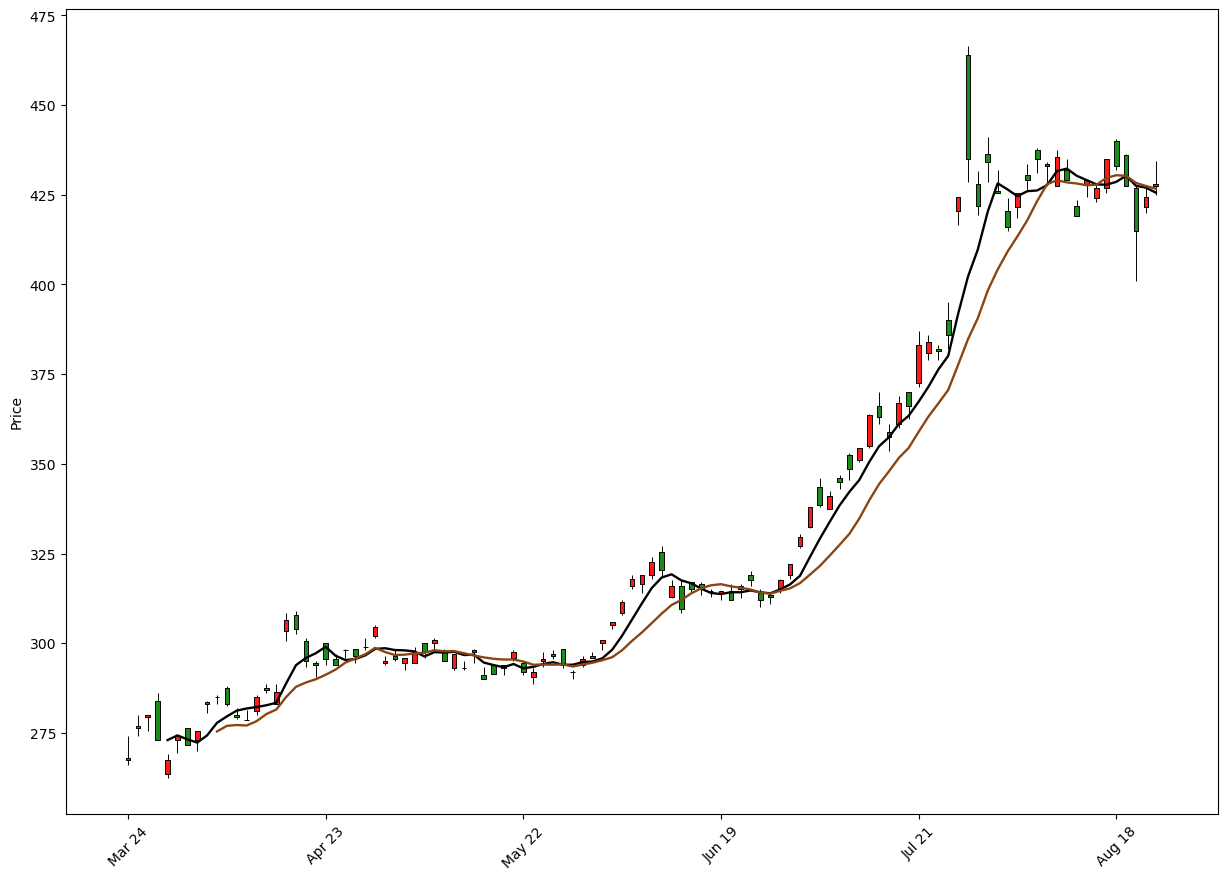

In [18]:
#Part1 介紹的自製移動平均線
import numpy as np
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks[50:155]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', figscale = 2, style = styleSet)

stocks_close = [line for line in stocks['Close']]

def making_averages(days):
    days_mav = [np.nan] * (days - 1)
    for i in range((days - 1), len(stocks_close)):
        days_mav.append( sum( stocks_close[i-(days - 1) : i+1]) / (days) )
    return days_mav

addplots = [
            mpf.make_addplot(making_averages(5), color = 'black'),
            mpf.make_addplot(making_averages(10), color = 'saddlebrown')
           ]

mpf.plot(stocks, **kwargs, addplot = addplots)

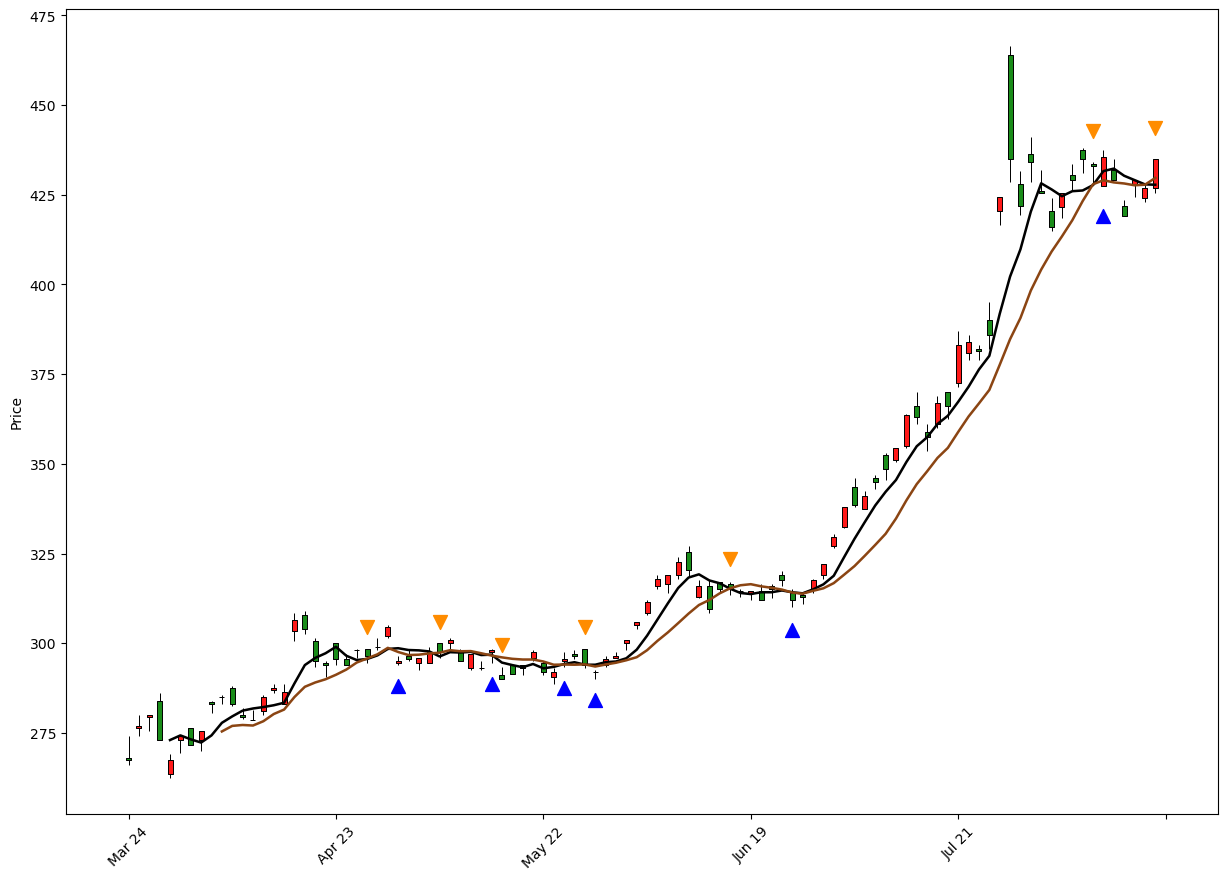

In [19]:
#畫點！
import numpy as np
import pandas as pd
import mplfinance as mpf
from datetime import datetime

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks[50:150]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', figscale = 2, style = styleSet)

stocks_close = [float(line) for line in stocks['Close']]
stocks_high = [float(line) for line in stocks['High']]
stocks_low = [float(line) for line in stocks['Low']]

def making_averages(days):
    days_mav = [np.nan] * (days - 1)
    for i in range((days - 1), len(stocks_close)):
        days_mav.append( sum( stocks_close[i-(days - 1) : i+1]) / (days) )
    return days_mav

################################################################################################################################

#策略實現
FiveMav = making_averages(5)    #宣告串列 -> 5日線
TenMav = making_averages(10)    #宣告串列 -> 10日線

#繪製點所使用的串列 (初始化)
points_buy = [np.nan] * len(stocks)    #買入點
points_sell = [np.nan] * len(stocks)   #賣出點

for i in range(11, len(stocks)):
    if(FiveMav[i - 1] < TenMav[i - 1] and FiveMav[i] > TenMav[i]):
        #繪製點所使用的陣列， 購買日最低價 * 0.98方便觀看
        points_buy[i] = stocks_low[i] * 0.98
        
    if(FiveMav[i - 1] > TenMav[i - 1] and FiveMav[i] < TenMav[i]):
        #繪製點所使用的陣列， 賣出日最高價 * 1.02方便觀看
        points_sell[i] = stocks_high[i] * 1.02

#點狀圖 type = 'scatter'，markersize可以更改 marker大小
addplots = [
            mpf.make_addplot(points_buy, type = 'scatter', color = 'blue', marker = '^', markersize = 100),
            mpf.make_addplot(points_sell, type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
            mpf.make_addplot(FiveMav, color = 'black'),
            mpf.make_addplot(TenMav, color = 'saddlebrown')
           ]

mpf.plot(stocks, **kwargs, addplot = addplots)

支出： 36422 元
收入： 36249 元
淨收益： -173 元
投資報酬率： -0.47 %


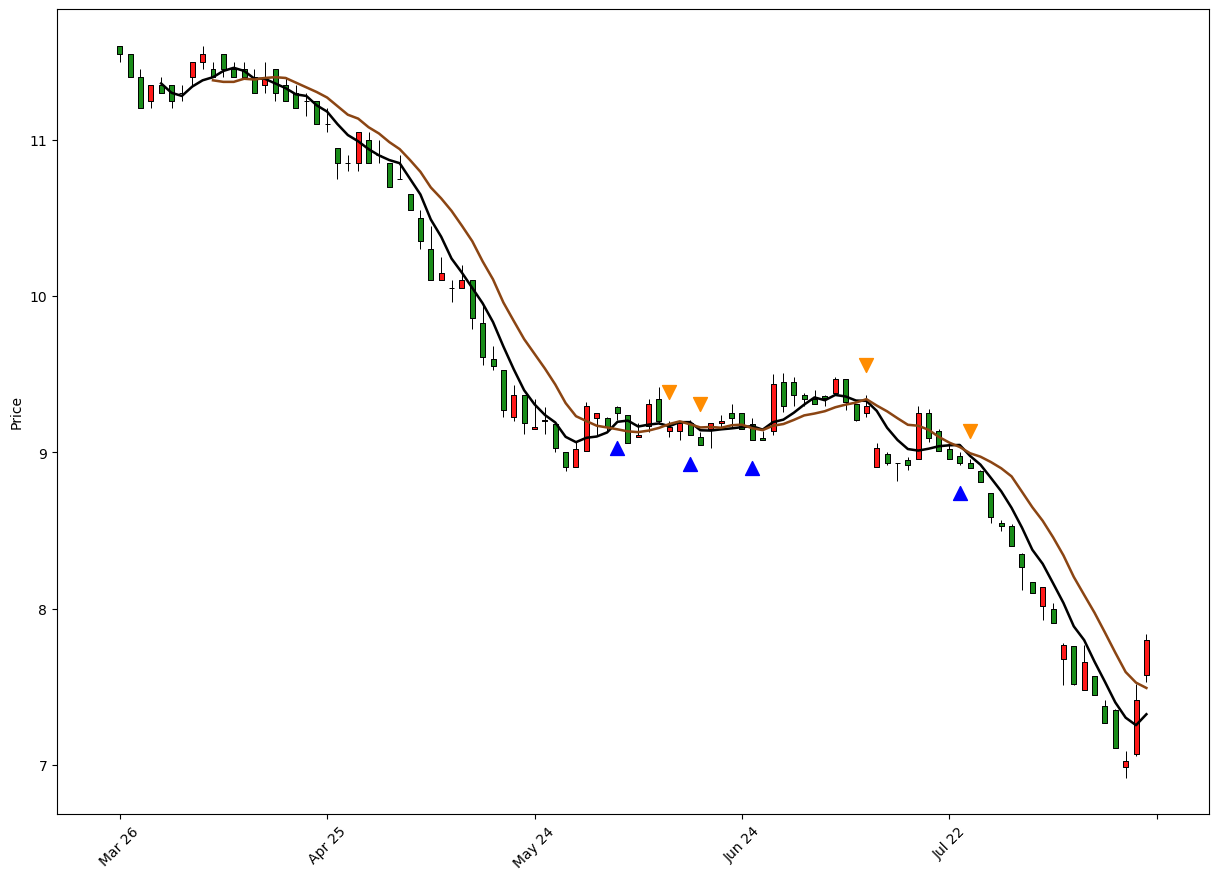

,0,1,2,3,4,5
0,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利
1,6/5,+1,9.25,9.3,-9263,-9263
2,6/13,-1,9.16,9,+9119,-144
3,6/17,+1,9.11,9.1,-9123,-9267
4,6/18,-1,9.05,9,+9010,-257
5,6/25,+1,9.08,9.1,-9093,-9350
6,7/10,-1,9.3,9,+9259,-91
7,7/23,+1,8.93,8.9,-8943,-9034
8,7/24,-1,8.9,9,+8861,-173


In [20]:
#畫點 & 計算！
import numpy as np
import pandas as pd
import mplfinance as mpf
from datetime import datetime

stocks = pd.read_csv(r'C:\Coding\10_VIP\data\2409.csv')

stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks[50:150]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', figscale = 2, style = styleSet)

stocks_close = [float(line) for line in stocks['Close']]
stocks_high = [float(line) for line in stocks['High']]
stocks_low = [float(line) for line in stocks['Low']]

def making_averages(days):
    days_mav = [np.nan] * (days - 1)
    for i in range((days - 1), len(stocks_close)):
        days_mav.append( sum( stocks_close[i-(days - 1) : i+1]) / (days) )
    return days_mav

################################################################################################################################

#策略實現
FiveMav = making_averages(5)    #宣告串列 -> 5日線
TenMav = making_averages(10)    #宣告串列 -> 10日線

#繪製點所使用的串列 (初始化)
points_buy = [np.nan] * len(stocks)    #買入點
points_sell = [np.nan] * len(stocks)   #賣出點

#股票張數
stock = 0

#每次購入張數
unit = 1

#目前獲利
gain = 0

#紀錄交易資訊
detail = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利']]

#暫時交易資訊
temp_detail = []

for i in range(11, len(stocks)):
    if(FiveMav[i - 1] < TenMav[i - 1] and FiveMav[i] > TenMav[i]):
        #繪製點所使用的陣列， 購買日最低價 * 0.98方便觀看
        points_buy[i] = stocks_low[i] * 0.98
        #淨收益計算
        gain -= round(stocks_close[i] * 1.001425 * unit * 1000)
        #交易資訊
        temp_detail.append(str(datetime.date(stocks['Date'][i]).month) + '/' +
                           str(datetime.date(stocks['Date'][i]).day))
        temp_detail.append('+' + str(unit))                                            #買賣 unit張，這邊假設為 1
        stock += unit                                                                  #股票張數 + unit張
        temp_detail.append(stocks_close[i])                                            #購買日買入價格，這邊假設為收盤價
        temp_detail.append(round(stocks_close[i] * 1.001425, 1))                       #抽稅之後的價格
        temp_detail.append('-' + str(round(stocks_close[i] * 1.001425 * unit * 1000))) #實際花費 (四捨五入到個位數)
        temp_detail.append(gain)                                                       #目前獲利
        detail.append(temp_detail)                                                     #紀錄交易資訊至正是表格中
        temp_detail = []                                                               #清除暫存交易資訊   
        
    if(FiveMav[i - 1] > TenMav[i - 1] and FiveMav[i] < TenMav[i] and stock > 0):
        #繪製點所使用的陣列， 賣出日最高價 * 1.02方便觀看
        points_sell[i] = stocks_high[i] * 1.02
        #淨收益計算
        gain += round(stocks_close[i] * 0.995575 * stock * 1000)
        #交易資
        temp_detail.append(str(datetime.date(stocks['Date'][i]).month) + '/' +
                           str(datetime.date(stocks['Date'][i]).day))
        temp_detail.append('-' + str(stock))                                           #股票全部賣出
        temp_detail.append(stocks_close[i])                                            #賣出日賣出價格，這邊假設為收盤價
        temp_detail.append(round(stocks_close[i] * 0.995575))                          #抽稅之後的價格
        temp_detail.append('+' + str(round(stocks_close[i] * 0.995575 * stock * 1000)))#實際收入 (四捨五入到個位數)
        temp_detail.append(gain)                                                       #目前獲利
        stock = 0                                                                      #因為全部股票賣出，所以當前股票張數歸零
        detail.append(temp_detail)                                                     #紀錄交易資訊至正是表格中
        temp_detail = []                                                               #清除暫存交易資訊   
         
#支出
cost = 0

#收入
income = 0

for i in range(1, len(detail)):
    #支出總和
    if(float(detail[i][4]) < 0):
        cost += abs(int(detail[i][4])) #取絕對值
    #收入總和
    elif(float(detail[i][4]) > 0):
        income += int(detail[i][4])
        
#支出、收入、淨收益、投資報酬率
print("支出：", cost, "元")
print("收入：", income, "元")
print("淨收益：", income - cost, "元")
print("投資報酬率：", round(100 * (income - cost) / cost, 2), "%")        

#點狀圖 type = 'scatter'，markersize可以更改 marker大小
addplots = [
            mpf.make_addplot(points_buy, type = 'scatter', color = 'blue', marker = '^', markersize = 100),
            mpf.make_addplot(points_sell, type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
            mpf.make_addplot(FiveMav, color = 'black'),
            mpf.make_addplot(TenMav, color = 'saddlebrown')
           ]

mpf.plot(stocks, **kwargs, addplot = addplots)

detail = pd.DataFrame(detail)
detail

## 3.2 案例2：簡單價線

### 簡單價線：策略介紹
利用股價穿越MA線為基準判斷買賣點

買入：股價往上漲破MA20 + 紅K線（美股是綠）  
賣出：股價往下跌破MA20 + 黑K線（美股是紅）  

-------------------------------------------------------------------------------------------------------------------------------

In [21]:
# 基本資料與會圖
import pandas as pd
import numpy as np

file = "0050.csv"
ticker = pd.read_csv(file)

# change the name of columns
ticker.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

# set the column "Date" to index
ticker = ticker.set_index('Date')

# set index column("Date") from string to datetime.datetime
ticker.index = pd.to_datetime(ticker.index)

# sort index column("Date") chronologically
ticker = ticker.sort_index()

# take latest 300 price data for analysis
ticker = ticker.tail(300)
print(ticker)

              Open    High     Low   Close  Volume
Date                                              
2019-12-27   97.60   98.15   97.60   98.00    2978
2019-12-30   98.00   98.25   97.60   97.80    3138
2019-12-31   97.10   97.20   96.95   96.95    4303
2020-01-02   97.05   98.00   97.05   97.65    4882
2020-01-03   98.30   98.70   97.00   97.65    6813
...            ...     ...     ...     ...     ...
2021-03-22  132.40  133.60  131.60  133.40    5510
2021-03-23  133.90  134.70  133.60  133.60    6994
2021-03-24  131.80  132.45  131.30  131.50   11082
2021-03-25  131.10  132.55  130.60  131.95    5186
2021-03-26  133.05  134.40  132.55  134.35    8134

[300 rows x 5 columns]


### 繪出MA與股價圖

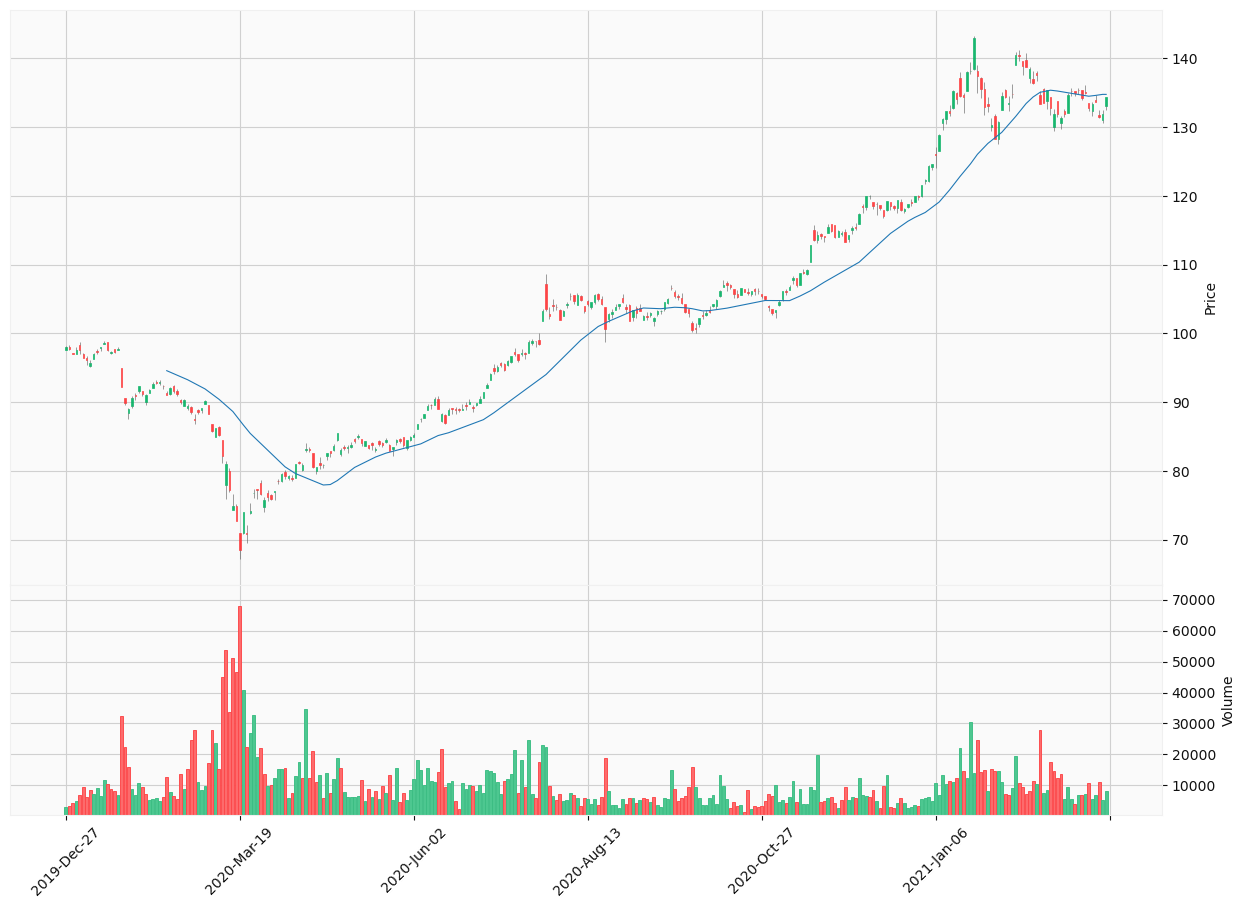

In [22]:
import mplfinance as mpf

# moving window of moving average indicator
# suhc as N = 30
MOVING_WINDOW = 30


mpf.plot(ticker,
         type='candle',       # candlestick chart of stock price
         mav = MOVING_WINDOW, # mav is moving average window
         volume=True,         # plots trading volume as well
         figscale=2,          # make graph twice bigger
         style='yahoo')       # color scheme using 'yahoo' style

### 簡單價線：策略買賣信號

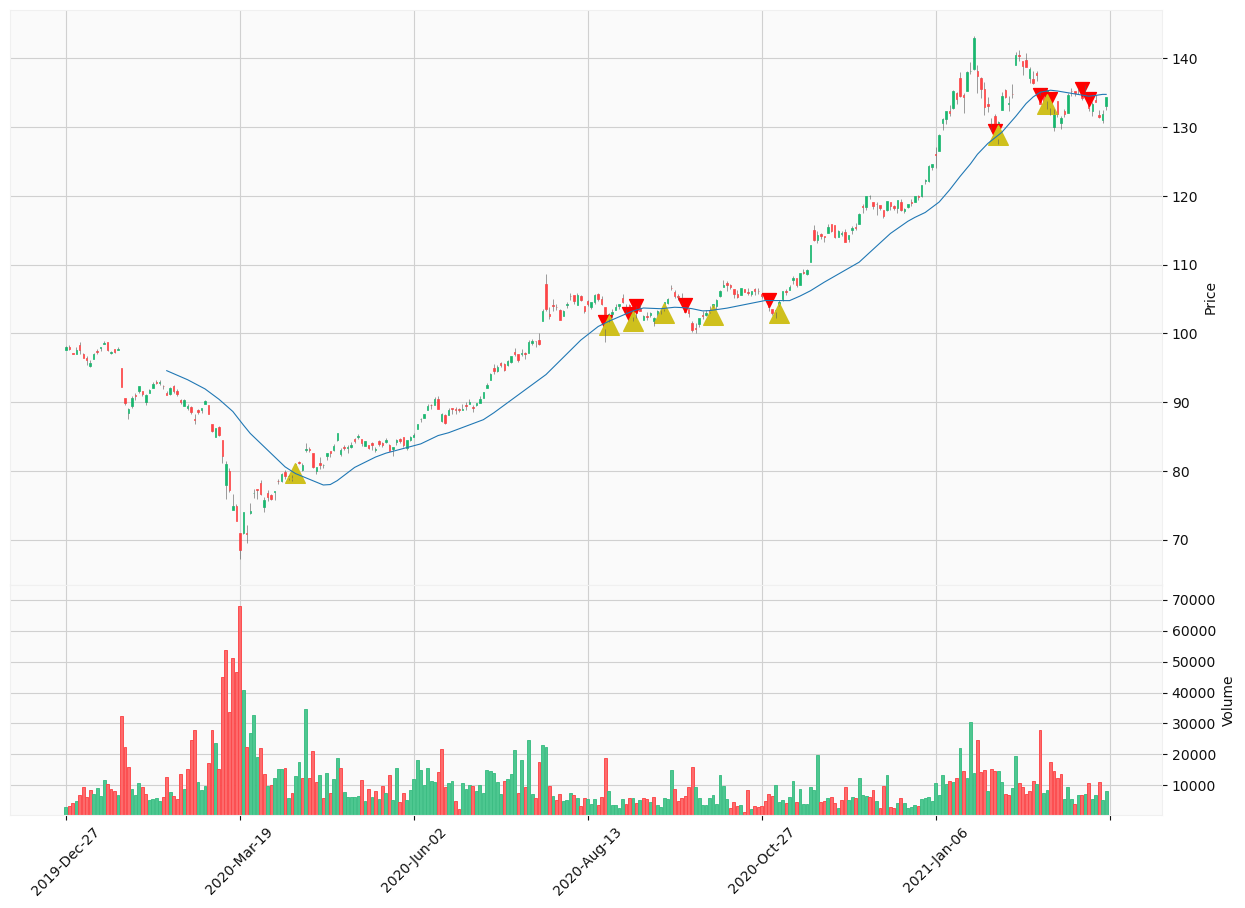

In [23]:
# make a copy from ticker
data = ticker

# calculate moving average by pandas.DataFrame.rolling()
data['ma'] = data['Close'].rolling(MOVING_WINDOW).mean()

# initialize 'buy' & 'sell' column by filling with 0
data['buy'] = np.zeros(ticker.shape[0])
data['sell'] = np.zeros(ticker.shape[0])



# the beginning data of MA is nan
# so we skip those data
for i in range(MOVING_WINDOW, data.shape[0]):

    if(data['Close'][i] > data['Open'][i]):
        
        # Close price crossover the MA indicator upward
        if (((data.iloc[i]['Close'] > data.iloc[i]['ma']) and
             (data.iloc[i-1]['Close'] < data.iloc[i-1]['ma'])) and
             (data.iloc[i]['Close'] > data.iloc[i-1]['Close'])):

            # data['buy'][i] = 1
            #   is a simple version of this line of code
            #   however "chained indexing" should be avoided
            #   while we are setting value.
            #   checkout reference to see more.
            data.loc[(data.index[i], 'buy')] = 1

    # Close price crossover the MA indicator downward
    if(data['Close'][i] < data['Open'][i]):
        if (((data.iloc[i]['Close'] < data.iloc[i]['ma']) and
             (data.iloc[i-1]['Close'] > data.iloc[i-1]['ma'])) and
             (data.iloc[i]['Close'] < data.iloc[i-1]['Close'])):

            data.loc[(data.index[i], 'sell')] = 1
plots = []

# the position in graph
buy, sell = [], []

# adjust the position to avoid signals block the lines
for index, row in data.iterrows():
    buy.append(row['Close']*0.985 if row['buy'] else np.nan)
    sell.append(row['Close']*1.01 if row['sell'] else np.nan)

# np.isnan(sell) determine the value is nan or not
# count_nonzero(np.isnan(sell)) counts how many nan we have
# if nan amount equal the length of array, we don't have sell record
if not np.count_nonzero(np.isnan(sell)) == len(sell):
    plots.append(mpf.make_addplot(sell , type = 'scatter', color = 'red', marker = 'v', markersize = 100))

if not np.count_nonzero(np.isnan(buy)) == len(buy):
    plots.append(mpf.make_addplot(buy , type = 'scatter', color = '#cfc01d', marker = '^', markersize = 200))

mpf.plot(data, 
            addplot = plots,
            type='candle',       # candlestick chart of stock price
            mav = MOVING_WINDOW, # mav is moving average window
            volume=True,         # plots trading volume as well
            figscale=2,          # make graph twice bigger
            style='yahoo')       # color scheme using 'yahoo' style



## 3.3 案例3：黃金交叉與死亡交叉

### 黃金交叉與死亡交叉：策略介紹
利用兩條MA線之間的交叉為基準判斷買賣點

買入：五日線和月線黃金交叉  
賣出：五日線和月線死亡交叉

### 黃金交叉與死亡交叉：策略買賣信號

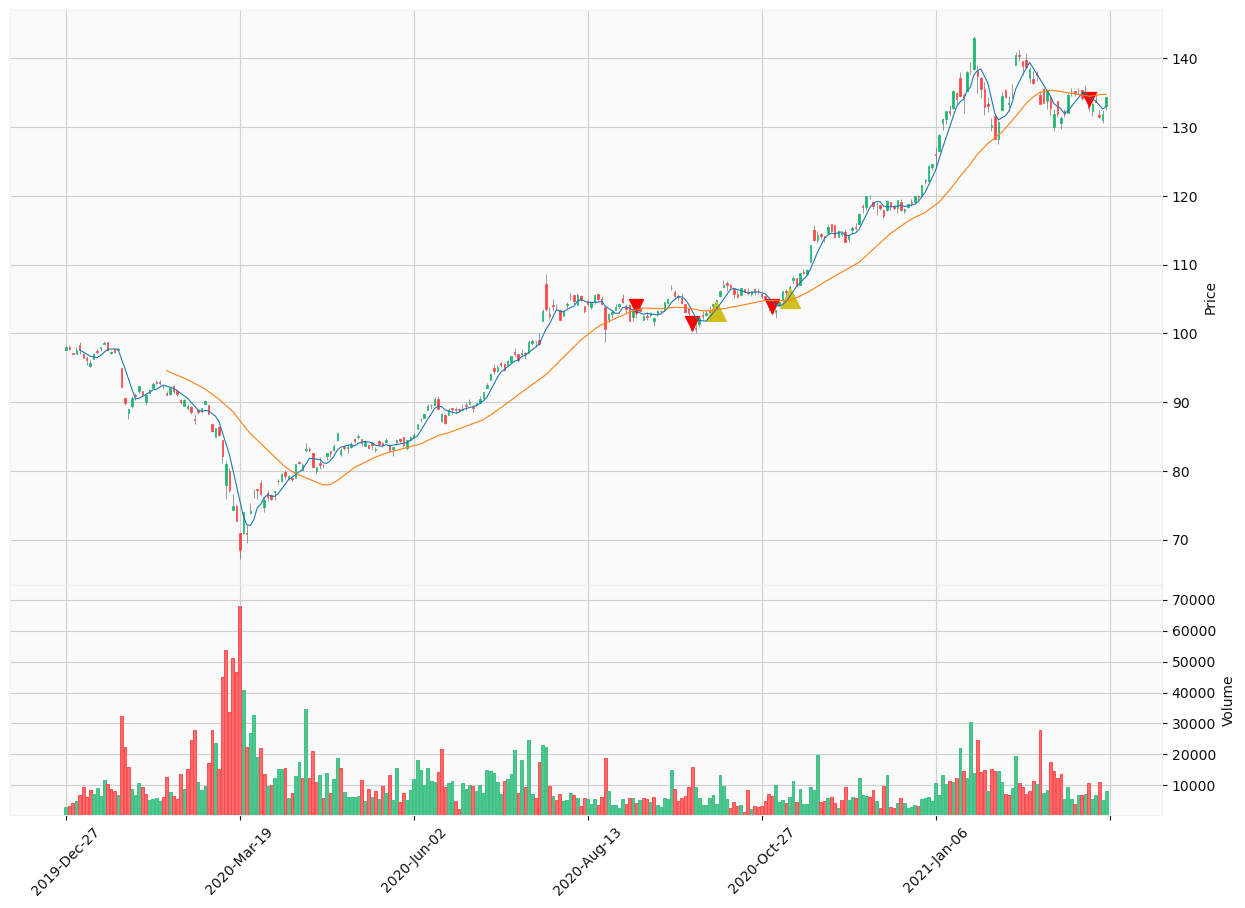

In [24]:
# make a copy from ticker
data = ticker

MOVING_WINDOW_1 = 5
MOVING_WINDOW_2 = 30
# calculate moving average by pandas.DataFrame.rolling()
data['ma_5'] = data['Close'].rolling(MOVING_WINDOW_1).mean()
data['ma_30'] = data['Close'].rolling(MOVING_WINDOW_2).mean()


# initialize 'buy' & 'sell' column by filling with 0
data['buy'] = np.zeros(ticker.shape[0])
data['sell'] = np.zeros(ticker.shape[0])



# the beginning data of MA is nan
# so we skip those data
for i in range(MOVING_WINDOW_2, data.shape[0]):

    if(data['Close'][i] > data['Open'][i]):
        
        # Close price crossover the MA indicator upward
        if (((data.iloc[i]['ma_5'] > data.iloc[i]['ma_30']) and
             (data.iloc[i-1]['ma_5'] < data.iloc[i-1]['ma_30'])) and
             (data.iloc[i]['ma_5'] > data.iloc[i-1]['ma_5'])):

            # data['buy'][i] = 1
            #   is a simple version of this line of code
            #   however "chained indexing" should be avoided
            #   while we are setting value.
            #   checkout reference to see more.
            data.loc[(data.index[i], 'buy')] = 1

    # Close price crossover the MA indicator downward
    if(data['Close'][i] < data['Open'][i]):
        if (((data.iloc[i]['ma_5'] < data.iloc[i]['ma_30']) and
             (data.iloc[i-1]['ma_5'] > data.iloc[i-1]['ma_30'])) and
             (data.iloc[i]['ma_5'] < data.iloc[i-1]['ma_5'])):

            data.loc[(data.index[i], 'sell')] = 1
plots = []

# the position in graph
buy, sell = [], []

# adjust the position to avoid signals block the lines
for index, row in data.iterrows():
    buy.append(row['Close']*0.985 if row['buy'] else np.nan)
    sell.append(row['Close']*1.01 if row['sell'] else np.nan)

# np.isnan(sell) determine the value is nan or not
# count_nonzero(np.isnan(sell)) counts how many nan we have
# if nan amount equal the length of array, we don't have sell record
if not np.count_nonzero(np.isnan(sell)) == len(sell):
    plots.append(mpf.make_addplot(sell , type = 'scatter', color = 'red', marker = 'v', markersize = 100))

if not np.count_nonzero(np.isnan(buy)) == len(buy):
    plots.append(mpf.make_addplot(buy , type = 'scatter', color = '#cfc01d', marker = '^', markersize = 200))

mpf.plot(data, 
            addplot = plots,
            type='candle',       # candlestick chart of stock price
            mav = (MOVING_WINDOW_1, MOVING_WINDOW_2), # mav is moving average window
            volume=True,         # plots trading volume as well
            figscale=2,          # make graph twice bigger
            style='yahoo')       # color scheme using 'yahoo' style



## 3.4 案例4：交叉+帶量

###  黃金交叉與死亡交叉：策略介紹
利用兩條MA線之間的交叉為基準判斷買賣點  
並用成交量作爲輔助

買入：
1. 五日線和月線黃金交叉

賣出：  
1. 五日線和月線死亡交叉 且  
2. 大量賣出：當日賣出量高於近期(5日)均值  
（避免交叉線反復來回造成的誤判）  



### 交叉+帶量：策略買賣信號

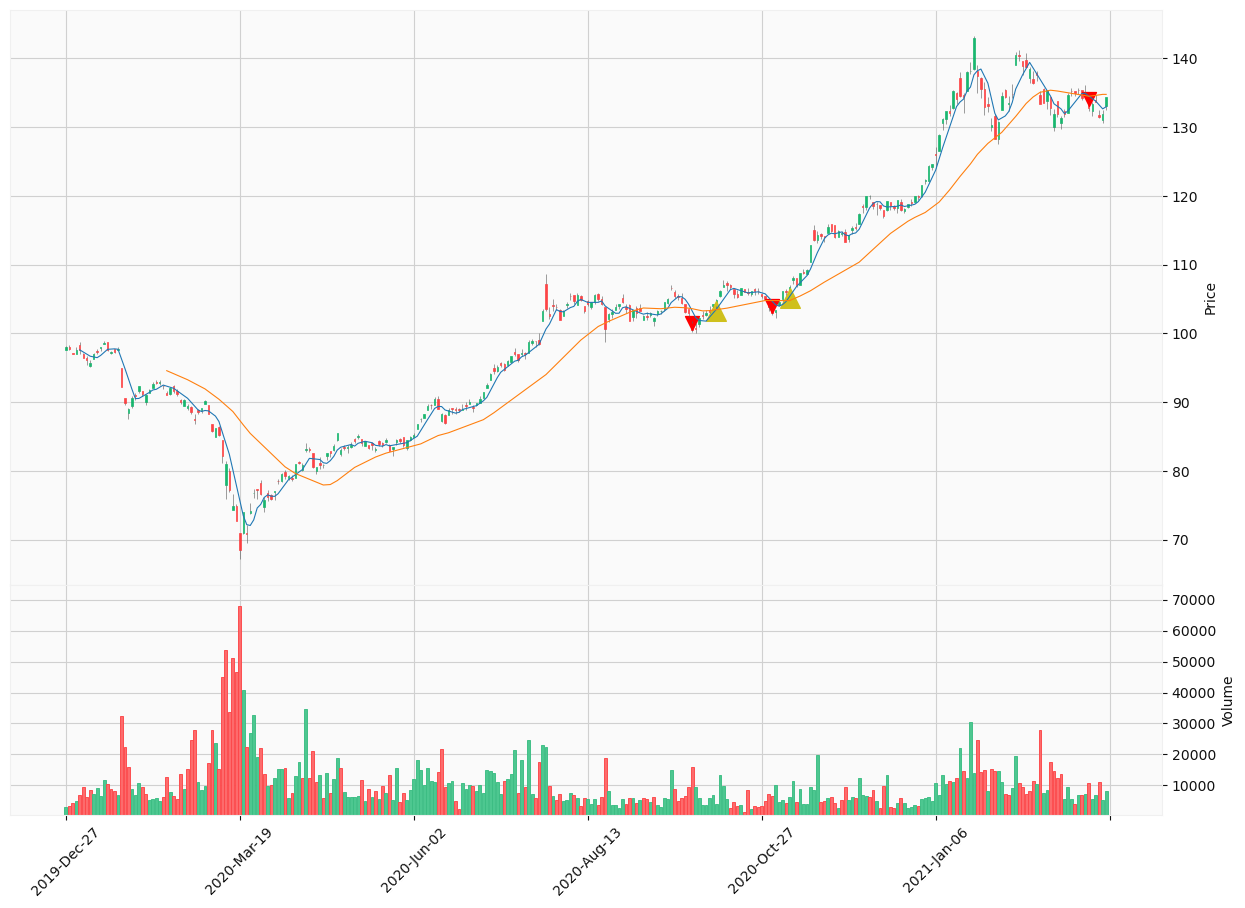

In [25]:
# make a copy from ticker
data = ticker

MOVING_WINDOW_1 = 5
MOVING_WINDOW_2 = 30
# calculate moving average by pandas.DataFrame.rolling()
data['ma_5'] = data['Close'].rolling(MOVING_WINDOW_1).mean()
data['ma_30'] = data['Close'].rolling(MOVING_WINDOW_2).mean()
data['vol_30'] = data['Volume'].rolling(MOVING_WINDOW_1).mean()

# initialize 'buy' & 'sell' column by filling with 0
data['buy'] = np.zeros(ticker.shape[0])
data['sell'] = np.zeros(ticker.shape[0])


# the beginning data of MA is nan
# so we skip those data
for i in range(MOVING_WINDOW_2, data.shape[0]):

    if(data['Close'][i] > data['Open'][i]):
        
        #print(data['Volume'][i])
        # Close price crossover the MA indicator upward
        if (((data.iloc[i]['ma_5'] > data.iloc[i]['ma_30']) and
             (data.iloc[i-1]['ma_5'] < data.iloc[i-1]['ma_30'])) and
             (data.iloc[i]['ma_5'] > data.iloc[i-1]['ma_5'])):

            # data['buy'][i] = 1
            #   is a simple version of this line of code
            #   however "chained indexing" should be avoided
            #   while we are setting value.
            #   checkout reference to see more.
            data.loc[(data.index[i], 'buy')] = 1

    # Close price crossover the MA indicator downward
    if(data['Close'][i] < data['Open'][i] and
       data['Volume'][i] > data['vol_30'][i]):
        if (((data.iloc[i]['ma_5'] < data.iloc[i]['ma_30']) and
             (data.iloc[i-1]['ma_5'] > data.iloc[i-1]['ma_30'])) and
             (data.iloc[i]['ma_5'] < data.iloc[i-1]['ma_5'])):

            data.loc[(data.index[i], 'sell')] = 1
            
            
plots = []

# the position in graph
buy, sell = [], []

# adjust the position to avoid signals block the lines
for index, row in data.iterrows():
    buy.append(row['Close']*0.985 if row['buy'] else np.nan)
    sell.append(row['Close']*1.01 if row['sell'] else np.nan)

# np.isnan(sell) determine the value is nan or not
# count_nonzero(np.isnan(sell)) counts how many nan we have
# if nan amount equal the length of array, we don't have sell record
if not np.count_nonzero(np.isnan(sell)) == len(sell):
    plots.append(mpf.make_addplot(sell , type = 'scatter', color = 'red', marker = 'v', markersize = 100))

if not np.count_nonzero(np.isnan(buy)) == len(buy):
    plots.append(mpf.make_addplot(buy , type = 'scatter', color = '#cfc01d', marker = '^', markersize = 200))

mpf.plot(data, 
            addplot = plots,
            type='candle',       # candlestick chart of stock price
            mav = (MOVING_WINDOW_1, MOVING_WINDOW_2), # mav is moving average window
            volume=True,         # plots trading volume as well
            figscale=2,          # make graph twice bigger
            style='yahoo')       # color scheme using 'yahoo' style



### 用買賣信號進行回測

In [26]:
# how many shares we hold, and the money balance
have_shares , balance = 0, 0

# multiple buy and 1 sell as "a trade"
# record trading times and how many trade are making money
make_money, trade_times = 0, 0

# we use geometic average
# this is products of return rate
return_rate = 1
for index, row in data.iterrows():
    
    if(row['buy'] == 1):
        balance -= row['Close']
        have_shares += 1
        print('buy ', row['Close'])
    
    # sell signal or it reach ends
    elif((data.loc[index]['sell'] == 1 or index == data.index.values[-1])and
    # and we have some shares
          have_shares != 0):
        
        print('sell', row['Close'], "*" , have_shares)
        
        principal = -balance
        balance += row['Close'] * have_shares
        
        # to calculate accuracy
        trade_times += 1
        if(balance > 0):
            make_money += 1
            
        # plus 1 avoiding get too small
        return_rate *= 1+(balance / principal)
        
        # reset balance & shares
        balance = 0
        have_shares = 0
      

print()
print('cumulative return rate :', (return_rate-1) * 100, '%')
if(trade_times != 0):
    print('accuracy :', make_money/ trade_times * 100, '%')

buy  104.8
sell 103.0 * 1
buy  106.7
sell 132.8 * 1

cumulative return rate : 22.323415154138402 %
accuracy : 50.0 %


參考資料：
吳宗正（2017）。投資技術分析。台北：華泰書局。
